## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  20.435000   371.714240  0.917813  10.786948  1.417786
1  52.374825  1464.191656  0.371689   3.832413  1.484861
2   6.919633   638.250777  0.774107   6.695491  1.587130
3  88.619357   191.965017  0.828311  10.397727  1.019525
4  53.564460  1455.636182  0.063287   9.769873  1.122411


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9333438	total: 55.3ms	remaining: 55.2s
1:	learn: 0.9258484	total: 55.8ms	remaining: 27.8s
2:	learn: 0.9181659	total: 56.4ms	remaining: 18.7s
3:	learn: 0.9114260	total: 57.1ms	remaining: 14.2s
4:	learn: 0.9032644	total: 57.6ms	remaining: 11.5s
5:	learn: 0.8957892	total: 58.1ms	remaining: 9.62s
6:	learn: 0.8860766	total: 58.4ms	remaining: 8.29s
7:	learn: 0.8776939	total: 58.9ms	remaining: 7.3s
8:	learn: 0.8692517	total: 59.3ms	remaining: 6.53s
9:	learn: 0.8611722	total: 59.8ms	remaining: 5.92s
10:	learn: 0.8544805	total: 60.2ms	remaining: 5.41s
11:	learn: 0.8469768	total: 60.7ms	remaining: 5s
12:	learn: 0.8408292	total: 61.2ms	remaining: 4.64s
13:	learn: 0.8337559	total: 61.6ms	remaining: 4.34s
14:	learn: 0.8258218	total: 62.1ms	remaining: 4.08s
15:	learn: 0.8191584	total: 62.7ms	remaining: 3.85s
16:	learn: 0.8128935	total: 63.1ms	remaining: 3.65s
17:	learn: 0.8062091	total: 63.6ms	remaining: 3.47s
18:	learn: 0.7994550	total: 64.1ms	remaining: 3.

115:	learn: 0.4093960	total: 105ms	remaining: 804ms
116:	learn: 0.4068832	total: 106ms	remaining: 801ms
117:	learn: 0.4045277	total: 107ms	remaining: 796ms
118:	learn: 0.4025593	total: 107ms	remaining: 792ms
119:	learn: 0.4006152	total: 107ms	remaining: 786ms
120:	learn: 0.3984244	total: 108ms	remaining: 782ms
121:	learn: 0.3968012	total: 108ms	remaining: 778ms
122:	learn: 0.3950603	total: 108ms	remaining: 773ms
123:	learn: 0.3929361	total: 109ms	remaining: 769ms
124:	learn: 0.3910697	total: 109ms	remaining: 765ms
125:	learn: 0.3889952	total: 110ms	remaining: 762ms
126:	learn: 0.3866296	total: 110ms	remaining: 759ms
127:	learn: 0.3847887	total: 111ms	remaining: 754ms
128:	learn: 0.3822576	total: 111ms	remaining: 750ms
129:	learn: 0.3807276	total: 112ms	remaining: 747ms
130:	learn: 0.3789494	total: 112ms	remaining: 744ms
131:	learn: 0.3768674	total: 113ms	remaining: 740ms
132:	learn: 0.3752176	total: 113ms	remaining: 736ms
133:	learn: 0.3734962	total: 114ms	remaining: 734ms
134:	learn: 

296:	learn: 0.1949493	total: 185ms	remaining: 437ms
297:	learn: 0.1944029	total: 185ms	remaining: 437ms
298:	learn: 0.1938145	total: 186ms	remaining: 436ms
299:	learn: 0.1931908	total: 186ms	remaining: 435ms
300:	learn: 0.1925098	total: 187ms	remaining: 434ms
301:	learn: 0.1920577	total: 188ms	remaining: 433ms
302:	learn: 0.1916885	total: 188ms	remaining: 432ms
303:	learn: 0.1910803	total: 189ms	remaining: 432ms
304:	learn: 0.1903466	total: 189ms	remaining: 431ms
305:	learn: 0.1896605	total: 190ms	remaining: 430ms
306:	learn: 0.1892448	total: 190ms	remaining: 429ms
307:	learn: 0.1886233	total: 191ms	remaining: 428ms
308:	learn: 0.1880145	total: 191ms	remaining: 427ms
309:	learn: 0.1876419	total: 192ms	remaining: 426ms
310:	learn: 0.1871491	total: 192ms	remaining: 426ms
311:	learn: 0.1866335	total: 193ms	remaining: 425ms
312:	learn: 0.1862063	total: 193ms	remaining: 424ms
313:	learn: 0.1855887	total: 193ms	remaining: 423ms
314:	learn: 0.1849526	total: 194ms	remaining: 421ms
315:	learn: 

488:	learn: 0.1017634	total: 270ms	remaining: 282ms
489:	learn: 0.1013847	total: 271ms	remaining: 282ms
490:	learn: 0.1009921	total: 271ms	remaining: 281ms
491:	learn: 0.1008785	total: 272ms	remaining: 281ms
492:	learn: 0.1004820	total: 272ms	remaining: 280ms
493:	learn: 0.1001005	total: 273ms	remaining: 279ms
494:	learn: 0.0999737	total: 273ms	remaining: 278ms
495:	learn: 0.0996029	total: 273ms	remaining: 278ms
496:	learn: 0.0992157	total: 274ms	remaining: 277ms
497:	learn: 0.0990842	total: 274ms	remaining: 276ms
498:	learn: 0.0987249	total: 274ms	remaining: 276ms
499:	learn: 0.0986184	total: 275ms	remaining: 275ms
500:	learn: 0.0985135	total: 275ms	remaining: 274ms
501:	learn: 0.0980940	total: 276ms	remaining: 274ms
502:	learn: 0.0976850	total: 276ms	remaining: 273ms
503:	learn: 0.0975599	total: 277ms	remaining: 272ms
504:	learn: 0.0971652	total: 277ms	remaining: 271ms
505:	learn: 0.0968598	total: 277ms	remaining: 271ms
506:	learn: 0.0965216	total: 278ms	remaining: 270ms
507:	learn: 

679:	learn: 0.0561185	total: 350ms	remaining: 165ms
680:	learn: 0.0559691	total: 350ms	remaining: 164ms
681:	learn: 0.0559301	total: 351ms	remaining: 164ms
682:	learn: 0.0557834	total: 351ms	remaining: 163ms
683:	learn: 0.0557347	total: 351ms	remaining: 162ms
684:	learn: 0.0556964	total: 352ms	remaining: 162ms
685:	learn: 0.0553904	total: 352ms	remaining: 161ms
686:	learn: 0.0553586	total: 352ms	remaining: 161ms
687:	learn: 0.0551637	total: 353ms	remaining: 160ms
688:	learn: 0.0550292	total: 353ms	remaining: 159ms
689:	learn: 0.0548056	total: 354ms	remaining: 159ms
690:	learn: 0.0545761	total: 354ms	remaining: 158ms
691:	learn: 0.0544300	total: 354ms	remaining: 158ms
692:	learn: 0.0541861	total: 355ms	remaining: 157ms
693:	learn: 0.0540216	total: 355ms	remaining: 157ms
694:	learn: 0.0538919	total: 356ms	remaining: 156ms
695:	learn: 0.0537746	total: 356ms	remaining: 156ms
696:	learn: 0.0535522	total: 357ms	remaining: 155ms
697:	learn: 0.0533911	total: 357ms	remaining: 154ms
698:	learn: 

919:	learn: 0.0281962	total: 452ms	remaining: 39.3ms
920:	learn: 0.0280937	total: 452ms	remaining: 38.8ms
921:	learn: 0.0280603	total: 453ms	remaining: 38.3ms
922:	learn: 0.0280273	total: 453ms	remaining: 37.8ms
923:	learn: 0.0280106	total: 453ms	remaining: 37.3ms
924:	learn: 0.0279228	total: 454ms	remaining: 36.8ms
925:	learn: 0.0278901	total: 454ms	remaining: 36.3ms
926:	learn: 0.0277429	total: 455ms	remaining: 35.8ms
927:	learn: 0.0277262	total: 455ms	remaining: 35.3ms
928:	learn: 0.0276941	total: 455ms	remaining: 34.8ms
929:	learn: 0.0276777	total: 456ms	remaining: 34.3ms
930:	learn: 0.0276382	total: 456ms	remaining: 33.8ms
931:	learn: 0.0276064	total: 457ms	remaining: 33.3ms
932:	learn: 0.0275046	total: 457ms	remaining: 32.8ms
933:	learn: 0.0274884	total: 457ms	remaining: 32.3ms
934:	learn: 0.0274371	total: 458ms	remaining: 31.8ms
935:	learn: 0.0274059	total: 458ms	remaining: 31.3ms
936:	learn: 0.0273751	total: 459ms	remaining: 30.9ms
937:	learn: 0.0273591	total: 459ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

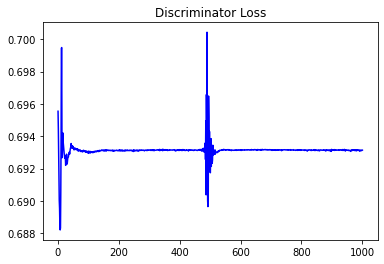

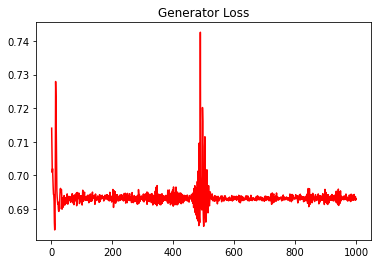

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6474366607074932


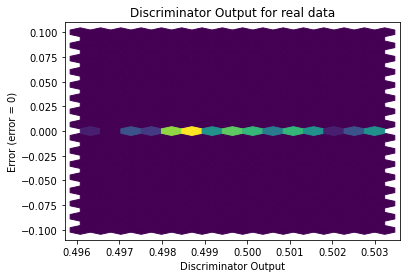

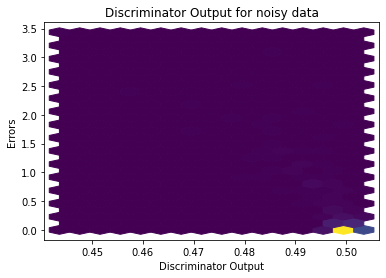

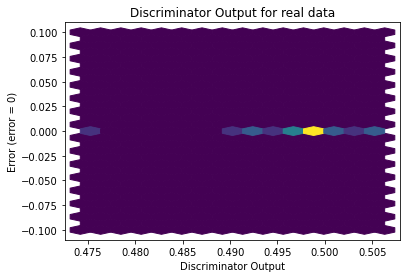

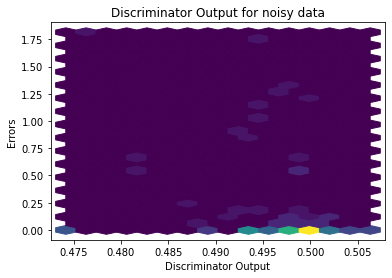

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


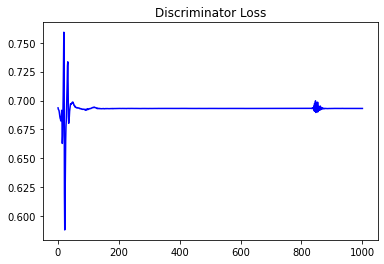

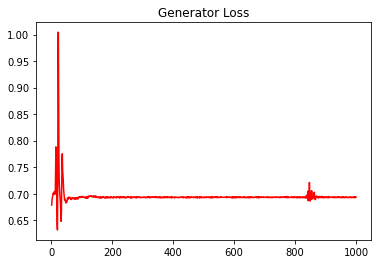

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6452571857165755


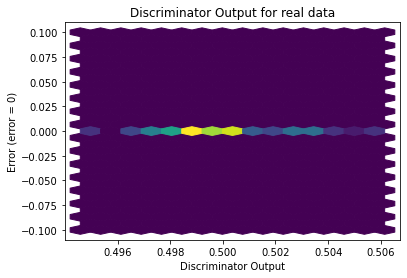

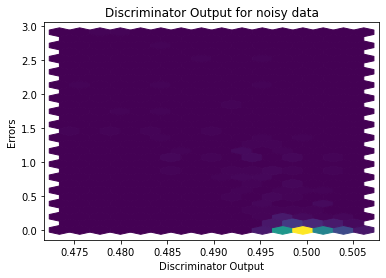

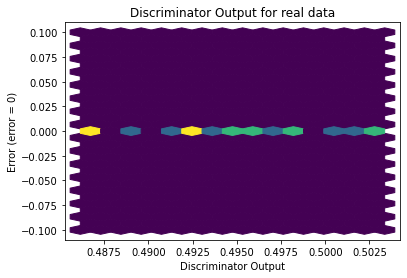

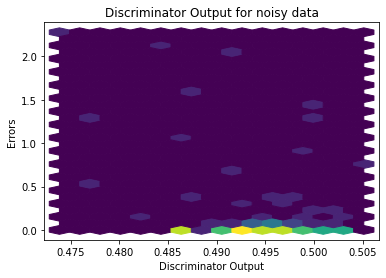

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5908]], requires_grad=True)
